In [64]:
import pandas as pd
import seaborn as sn
import numpy as np
import datetime
import gensim

In [59]:
df = pd.read_csv("./fitting_time_topics.csv")
df['fitting_time'] = pd.to_timedelta(df['fitting_time'])

df['fitting_time'] = df['fitting_time'].map(lambda x: (x.total_seconds()))

df.head()

,n_topics,percentage_corpus,fitting_time
0,50,0.01,34.770199
1,100,0.01,51.080717
2,150,0.01,39.406861
3,200,0.01,42.659622
4,250,0.01,49.875112


<AxesSubplot:xlabel='n_topics', ylabel='fitting_time'>

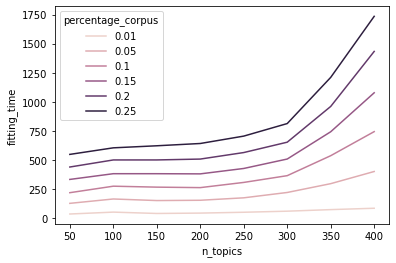

In [60]:
sn.lineplot(data=df, x="n_topics", y="fitting_time", hue="percentage_corpus")

<AxesSubplot:xlabel='percentage_corpus', ylabel='fitting_time'>

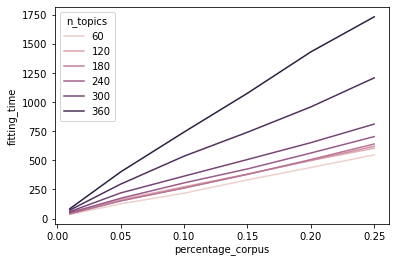

In [61]:
sn.lineplot(data=df, x="percentage_corpus", y="fitting_time", hue="n_topics")

<AxesSubplot:xlabel='percentage_corpus', ylabel='n_topics'>

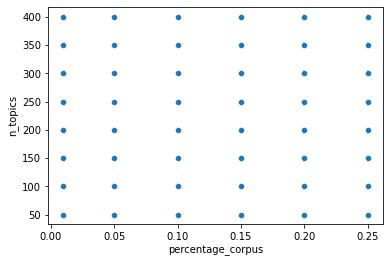

In [63]:
sn.scatterplot(data=df, x="percentage_corpus", y="n_topics")

In [117]:
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

from collections import Counter

In [150]:
lda = gensim.models.ldamulticore.LdaMulticore.load("./perc_0.25_model_50_topics")

K = lda.num_topics
w_ids = []
for i in range(K):
    x = lda.get_topic_terms(i)
    w_ids.append([j[0] for j in x])
    w_ids[i].sort()
    w_ids[i] = "".join([str(w) for w in w_ids[i]])


In [152]:
topic_words = [[j[0] for j in lda.show_topic(i,topn = 10)] for i in range(lda.num_topics)]

topic_df = pd.DataFrame(topic_words)

print(topic_df.to_string())


                  0                  1                  2                  3                      4                    5                       6                7                8                  9
0   instrumentation         proteomics  mass_spectrometry           analysis                   core           instrument          flow_cytometry        cytometry         facility            sorting
1            muscle              heart             injury           ischemia          heart_failure                 cell                   brain           stress      dysfunction          mechanism
2              gene           mutation         chromosome            linkage                 family                locus                   mouse           region          disease          phenotype
3           patient              trial          treatment                hiv                 stroke              outcome            intervention             care          therapy               risk
4         

In [129]:
max(Counter(w_ids).values())

41

In [137]:
lda.get_topic_terms(3)

[(3640, 0.00018304962),
 (3638, 0.00018304962),
 (3647, 0.00018304962),
 (3646, 0.00018304962),
 (3645, 0.00018304962),
 (3644, 0.00018304962),
 (3643, 0.00018304962),
 (3642, 0.00018304962),
 (3641, 0.00018304962),
 (3649, 0.00018304962)]